### The Data Story -- Building a Bayesian model

Given a map representing the Earth, you want to estimate how much of the surface is covered in water. You sample it randomly by tossing a pin to it and recording where it points to. You toss the pin on the map again and repeat the procedure. From this process a sequences of surface samples are generated:

W L W W W L W L W

where W indicates water and L indicates land. This sequence of observations is the data. 

Our problem is how to use the data (the sequence of W and L) to decide among different possible proportions of water on the globe.

The data story in this case is simply a restatement of the sampling process:
1. The true proportion of water covering the globe is p.
1. A single toss on the map has a probability p of producing a water (W) observation. It has a probability 1 − p of producing a land (L) observation.
2. Each toss on the map is independent of the others.

Our problem is one of using the evidence—the sequence of map tosses—to decide among diﬀerent possible proportions of water on the map. Each possible proportion may be more or less plausible, given the evidence. A Bayesian model begins with one set of plausibilities assigned to each of these possibilities (the possible proportions of water on the map). These are the prior plausibilities. Then it updates them in light of the data, to produce the posterior plausibilities. This updating process is a kind of learning, called Bayesian updating.

![](lab2-img/bayes_updating.png)

Bayesian inference: Logical answer to a question in the form of a model :

“How plausible is each proportion of water, given these data?”


### Likelihood

We first require to have the likelihood. The likelihood is a mathematical formula that specifies the plausibility of the data given the conjecture (or hypothesis).The likelihood defines the probability of each observation conditional on the assumptions, i.e. the relative count of the number of ways of seeing data (probability), given a particulr conjecture or hypothesis.

The likelihood maps each conjecture (or hypothesis), in this case, the proportion of water on the map, onto the number of ways the data (in this case, W, L) could occur. You can build the likelihood from the basic assumptions on the how the data was sampled. The likelihood needs to you the probability of any possible observation for any possible state of the world, such as proportion of water on the globe. It is also the number of ways each conjecture (p) could produce an observation (sequence of W or L).

The likelihood is written L(p|w,n). It is the likelihood of p, the probability of water in the map, given w and n. The w is the count of times of 'water' observations out of n trials. Another way of saying this if we observed, say, w=6 out of n=9 observations, what is the probability (proportion) of water on the map?

If you remember the binomial lesson, the likelihood of data (=value of a given p) can be found from the binomial distribution for a given p. The count of w's is distributed binomially where each w has a probability of p for n tosses in total. 

In the map example, both n and w are data—we believe that we have observed their values without error. That leaves p as an unknown parameter, and our Bayesian machine’s job is to describe what the data tell us about p.

!['Binomial Formula'](lab2-img/binomial_likelihood.png)

For example, the likelihood of w=6 in n=9 trials for p=0.5, can be calculated as:
```
stats.binom.pmf(6, n=9, p=0.5)
```

In [1]:
%matplotlib inline
#import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


In [2]:
#The likelihood of w=6 in n=9 trials for p=0.5
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

### Bayesian Machinery

1. List variables: data & parameters (hypothesis) that we want to estimate
2. Get data distribution (likelihood)
3. Get _prior_ parameter distribution
4. Deduce _posterior_ parameter distribution via Bayes Theorem

Variables
n: number of tosses, 
nw: number of water landings, 
p: proportion of water on map

Parameters
p : can't be observed, has to be inferred (or estimated)

Bayesian estimate is always posterior distribution over parameters Pr(paramters|data).

!["Bayes Theorem"](lab2-img/bayes_theorem.png)

The posterior distribution is a product of the prior distribution and likelihood.Top row: A ﬂat prior constructs a posterior that is simply proportional to the likelihood. Middle row: A step prior, assigning zero probability to all values less than 0.5, resulting in a truncated posterior. Bottom row: A peaked prior that shifs and skews the posterior, relative to the likelihood.

!['Posterior Distribution'](lab2-img/posterior.png)


Let's define the code to obtain the posterior distribution. We use a method called grid approximation. Even if the parameters are continuouss, we can achieve an excellent approximation of the continuous posterior distribution by considering only a fnite grid of parameter values. At any particular value of a parameter, p′, it’s a simple matter to compute the posterior probability: just multiply the prior probability of p′ by the likelihood at p′. Repeating this procedure for each value in the grid generates an approximate picture of the exact posterior distribution. 

In the context of the globe tossing problem, grid approximation works extremely well.
So let’s build a grid approximation for the model we’ve constructed so far. Here is the recipe:
1. Defne the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values

In [3]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    default values: grid_points=5, success=6, tosses=9
    """
    #1. define grid
    p_grid = np.linspace(0, 1, grid_points)

    #2. define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    #3. compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    #4. compute product of likelihood and prior
    raw_posterior = likelihood * prior

    #5. standardize the posterior, so it sums to 1b
    posterior = raw_posterior / raw_posterior.sum()
    return p_grid, posterior

Text(0.5, 1.0, 'Likelihood')

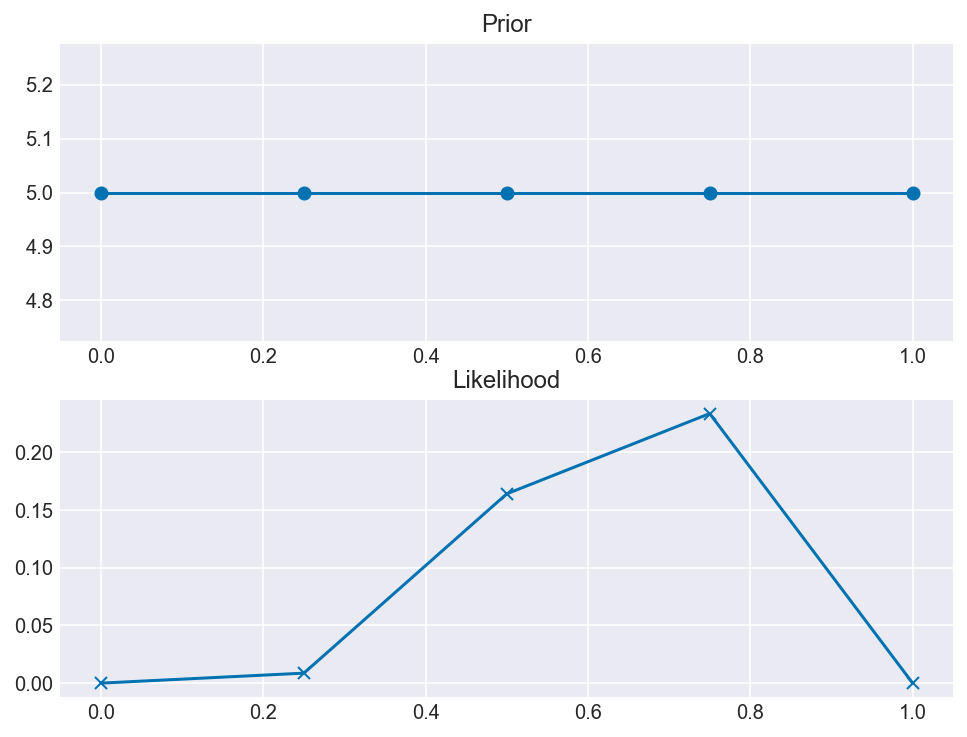

In [4]:
#print out each line to understand
#define the grid; adjust the grid points number
plt.figure(figsize=(8,6))
grid_points=5
p_grid = np.linspace(0, 1, grid_points)

#plot the prior
prior = np.repeat(5, grid_points)
plt.subplot(2,1,1)
plt.plot(p_grid,prior,'o-')
plt.title('Prior')

#plot the likelihood
success=6 
tosses=9
likelihood = stats.binom.pmf(success, tosses, p_grid)
plt.subplot(2,1,2)
plt.plot(p_grid,likelihood,'x-')
plt.title('Likelihood')


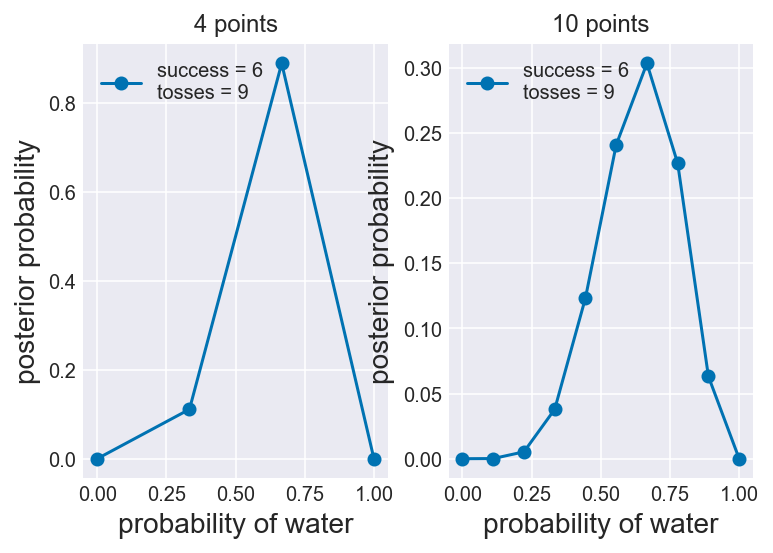

In [5]:
points = 4
w, n = 6,9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,1)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

points = 10
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,2)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


What __happens__ if you increase the sampling points for p? We are computing posterior distribution by grid approximation. In each plot, the posterior distribution for the map toss data and model is approximated with a fnite number of evenly spaced points. With only 4 points (above, left), the approximation is terrible. But with 20 points (below left), the approximation is already quite good.

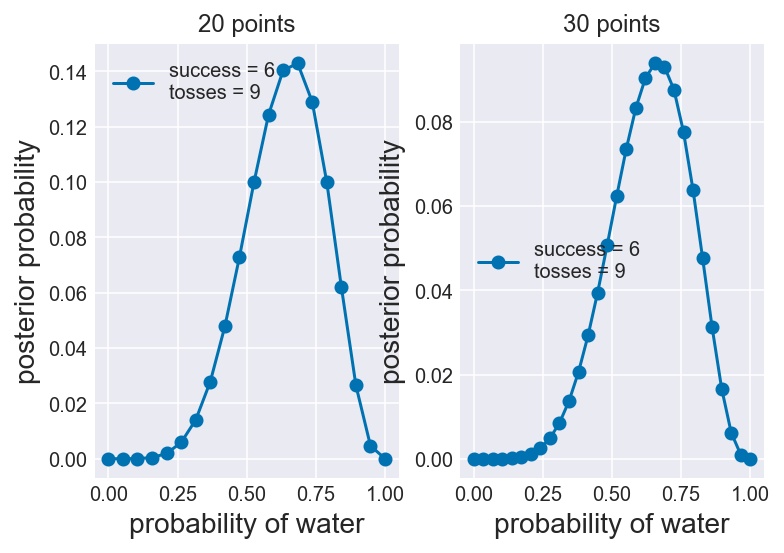

In [11]:
            
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,1)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

points = 30
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,2)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);



### Task 3 (Part B)

Ok, take out the printed map, throw the pin on the map. Compute and plot the grid approximation posterior distribution for the following observations: L, W, W, L, W, W, W. Assume a uniform prior for p. 

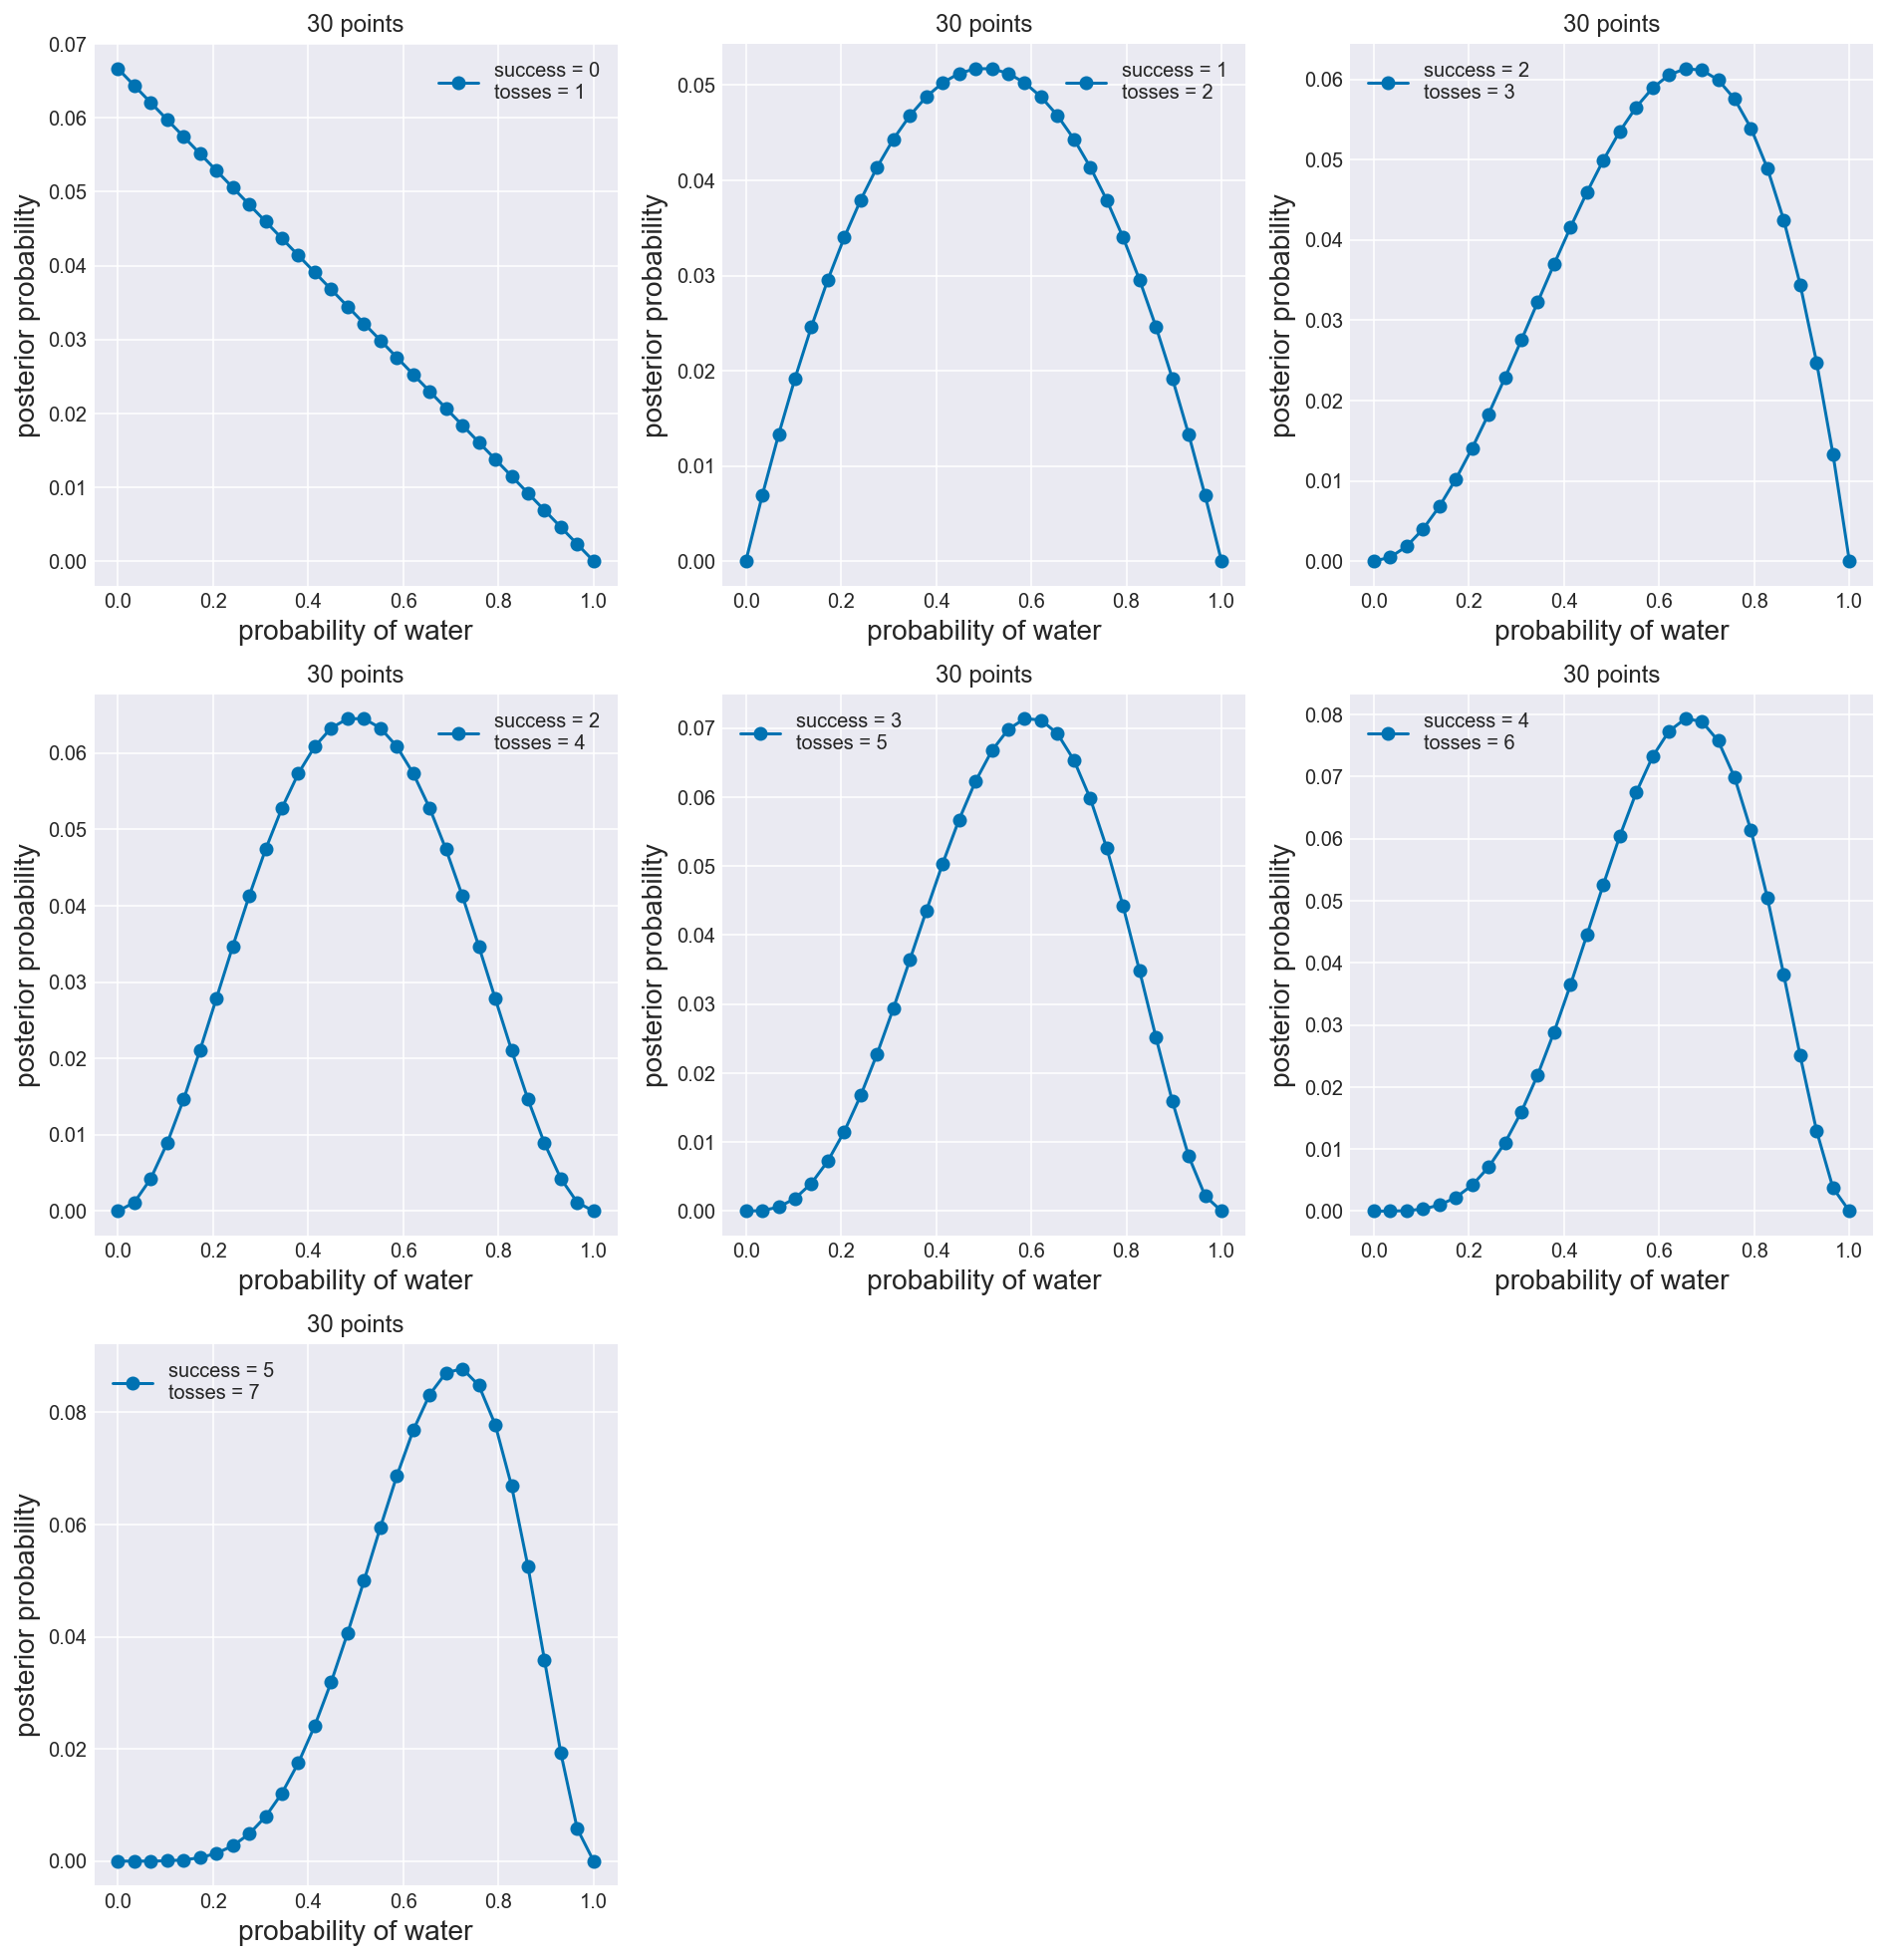

In [34]:
plt.figure(figsize=(16,17))
grid_points=5
p_grid = np.linspace(0, 1, grid_points)

# L (1 toss)
points = 30
w, n = 0, 1
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,1)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W (2 tosses)
points = 30
w, n = 1, 2
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,2)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W (3 tosses)
points = 30
w, n = 2, 3
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,3)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W,L (4 tosses)
points = 30
w, n = 2, 4
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,4)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W,L,W (5 tosses)
points = 30
w, n = 3, 5
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,5)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W,L,W,W (6 tosses)
points = 30
w, n = 4, 6
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,6)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W,L,W,W,W (7 tosses)
points = 30
w, n = 5, 7
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(3,3,7)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);